In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [1]:
from geo_transform.tf_tps import ThinPlateSpline as tps

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
img_name = "sample_dataset/060_0000.png"
#img_name = "original.png"

In [4]:
img = cv2.imread(img_name)[:,:,::-1]
img = cv2.resize(img, (200, 200) ,interpolation=cv2.INTER_AREA)

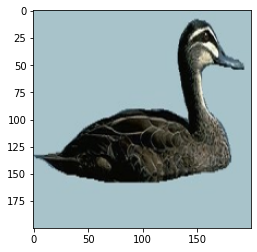

In [5]:
plt.imshow(img)

In [6]:
img.shape

(200, 200, 3)

In [7]:
p = np.array([
  [-0.5, -0.5],
  [0.5, -0.5],
  [-0.0, 0.0],
  [-0.5, 0.5],
  [0.5, 0.5]])

v = np.array([
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0]])

p = tf.constant(p.reshape([1, 5, 2]), dtype=tf.float32)
v = tf.constant(v.reshape([1, 5, 2]), dtype=tf.float32)
#t_img = tf.constant(img.reshape(shape), dtype=tf.float32)
img = np.reshape(img, (1, 200, 200, 3))

out_size=(200, 200)

x_s, y_s = tps(p, -v, out_size)

In [8]:
x_s

<tf.Tensor: shape=(1, 200, 200), dtype=float32, numpy=
array([[[0.0000000e+00, 9.9999267e-01, 1.9999913e+00, ...,
         1.9700002e+02, 1.9800000e+02, 1.9900000e+02],
        [0.0000000e+00, 9.9999267e-01, 1.9999913e+00, ...,
         1.9700002e+02, 1.9800000e+02, 1.9900000e+02],
        [0.0000000e+00, 9.9999267e-01, 1.9999913e+00, ...,
         1.9700002e+02, 1.9800000e+02, 1.9900000e+02],
        ...,
        [5.9306622e-06, 1.0000045e+00, 2.0000031e+00, ...,
         1.9700002e+02, 1.9800000e+02, 1.9900000e+02],
        [5.9306622e-06, 1.0000045e+00, 2.0000031e+00, ...,
         1.9700002e+02, 1.9800000e+02, 1.9900000e+02],
        [5.9306622e-06, 1.0000045e+00, 2.0000031e+00, ...,
         1.9700002e+02, 1.9800000e+02, 1.9900000e+02]]], dtype=float32)>

In [11]:
x_s[0].numpy()

array([[0.0000000e+00, 9.9999267e-01, 1.9999913e+00, ..., 1.9700002e+02,
        1.9800000e+02, 1.9900000e+02],
       [0.0000000e+00, 9.9999267e-01, 1.9999913e+00, ..., 1.9700002e+02,
        1.9800000e+02, 1.9900000e+02],
       [0.0000000e+00, 9.9999267e-01, 1.9999913e+00, ..., 1.9700002e+02,
        1.9800000e+02, 1.9900000e+02],
       ...,
       [5.9306622e-06, 1.0000045e+00, 2.0000031e+00, ..., 1.9700002e+02,
        1.9800000e+02, 1.9900000e+02],
       [5.9306622e-06, 1.0000045e+00, 2.0000031e+00, ..., 1.9700002e+02,
        1.9800000e+02, 1.9900000e+02],
       [5.9306622e-06, 1.0000045e+00, 2.0000031e+00, ..., 1.9700002e+02,
        1.9800000e+02, 1.9900000e+02]], dtype=float32)

In [9]:
t_img = cv2.remap(img[0], x_s[0].numpy(), y_s[0].numpy(), cv2.INTER_CUBIC)

In [21]:
img[0]

array([[[168, 195, 202],
        [168, 195, 202],
        [168, 195, 202],
        ...,
        [168, 195, 202],
        [168, 195, 202],
        [168, 195, 202]],

       [[168, 195, 202],
        [168, 195, 202],
        [168, 195, 202],
        ...,
        [168, 195, 202],
        [168, 195, 202],
        [168, 195, 202]],

       [[168, 195, 202],
        [168, 195, 202],
        [168, 195, 202],
        ...,
        [168, 195, 202],
        [168, 195, 202],
        [168, 195, 202]],

       ...,

       [[168, 195, 202],
        [168, 195, 202],
        [168, 195, 202],
        ...,
        [168, 195, 202],
        [168, 195, 202],
        [168, 195, 202]],

       [[168, 195, 202],
        [168, 195, 202],
        [168, 195, 202],
        ...,
        [168, 195, 202],
        [168, 195, 202],
        [168, 195, 202]],

       [[168, 195, 202],
        [168, 195, 202],
        [168, 195, 202],
        ...,
        [168, 195, 202],
        [168, 195, 202],
        [168, 195, 202]]

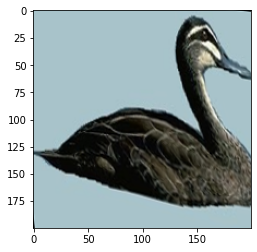

In [10]:
plt.imshow(t_img)

In [ ]:
x_s.shape, y_s.shape

In [11]:
s_img = img/255
s_img = s_img.astype(np.float32)

In [12]:
import tensorflow_addons as tfa

In [13]:
sampled_image = tfa.image.resampler(s_img, tf.stack([x_s, y_s], axis=-1))

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/utils/resource_loader.py:103: UserWarning: You are currently using TensorFlow 2.3.0-rc2 and trying to load a custom op (custom_ops/image/_resampler_ops.so).
TensorFlow Addons has compiled its custom ops against TensorFlow 2.2.0, and there are no compatibility guarantees between the two versions. 
This means that you might get segfaults when loading the custom op, or other kind of low-level errors.
 If you do, do not file an issue on Github. This is a known limitation.

It might help you to fallback to pure Python ops with TF_ADDONS_PY_OPS . To do that, see https://github.com/tensorflow/addons#gpucpu-custom-ops 

You can also change the TensorFlow version installed on your system. You would need a TensorFlow version equal to or above 2.2.0 and strictly below 2.3.0.
 Note that nightly versions of TensorFlow, as well as non-pip TensorFlow like `conda install tensorflow` or compiled from source are not supported.

The last solution i

In [ ]:
img

In [14]:
sampled_image[0]

<tf.Tensor: shape=(200, 200, 3), dtype=float32, numpy=
array([[[0.6588235 , 0.76470584, 0.7921569 ],
        [0.65882355, 0.76470596, 0.7921568 ],
        [0.65882355, 0.7647059 , 0.7921568 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.65882355, 0.7647059 , 0.7921569 ],
        [0.65882355, 0.76470584, 0.7921568 ],
        [0.6588236 , 0.76470596, 0.7921569 ],
        ...,
        [0.37550032, 0.43584856, 0.45149443],
        [0.29811314, 0.34602416, 0.35844553],
        [0.22025707, 0.25565553, 0.2648329 ]],

       [[0.65882355, 0.7647059 , 0.7921569 ],
        [0.6588236 , 0.7647059 , 0.7921569 ],
        [0.65882355, 0.7647059 , 0.7921569 ],
        ...,
        [0.65882355, 0.7647059 , 0.79215693],
        [0.65882355, 0.7647059 , 0.7921569 ],
        [0.6588236 , 0.7647059 , 0.7921568 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.37

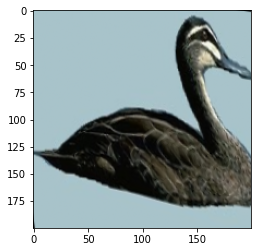

In [15]:
plt.imshow(sampled_image[0].numpy())

In [ ]:
x_s.shape

In [ ]:
y_s

In [ ]:
x_s_flat = x_s_flat*200/2

In [ ]:
y_s_flat = y_s_flat*200/2

In [ ]:
x_s_flat.shape

In [ ]:
x_s_flat[0,:5,:5]

In [ ]:
img.shape

In [ ]:
import cv2

In [ ]:
t_img.shape

In [ ]:
t_img.shape

In [ ]:
t_img[0].numpy().min()